# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Import Dependencies

In [1]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#data science - standard library
import pandas as pd
import numpy as np

#regression
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [2]:
filepath = "cities.csv"
df = pd.read_csv(filepath)

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Saskylakh,71.92,114.08,-7.91,-22.68,86,1008,14.38,13
1,Te Anau,-45.42,167.72,57.13,52.84,55,1018,4.05,92
2,Busselton,-33.65,115.33,60.37,53.62,82,996,14.65,97
3,Puerto Ayora,-0.74,-90.35,69.01,70.34,83,1012,5.99,11
4,Hirado,33.36,129.55,56.39,45.70,47,1022,13.87,20


In [3]:
df.shape

(554, 9)

In [4]:
df.describe()

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,20.323628,16.751372,56.247635,52.384657,73.081227,1014.093863,8.321769,47.265343
std,33.024364,91.575734,22.355074,27.472996,18.999350,10.832200,6.358099,38.663429
min,-54.800000,-179.170000,-16.330000,-26.480000,1.000000,890.000000,0.450000,0.000000
25%,-5.195000,-67.432500,41.525000,32.335000,62.000000,1011.000000,3.360000,3.000000
50%,25.115000,22.715000,60.775000,56.705000,78.000000,1014.500000,6.900000,40.000000
75%,46.427500,98.512500,74.985000,74.245000,87.000000,1021.000000,11.425000,90.000000
max,78.220000,179.320000,95.000000,95.110000,100.000000,1032.000000,44.430000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         554 non-null    object 
 1   Latitude     554 non-null    float64
 2   Longitude    554 non-null    float64
 3   Temperature  554 non-null    float64
 4   Feels Like   554 non-null    float64
 5   Humidity     554 non-null    int64  
 6   Pressure     554 non-null    int64  
 7   Wind Speed   554 non-null    float64
 8   Cloudiness   554 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 39.1+ KB


In [6]:
#Since we can tell from the table of df.describe() there are no cities that have humidity > 100%, we  skip this step.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Numeric Visualization

findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.


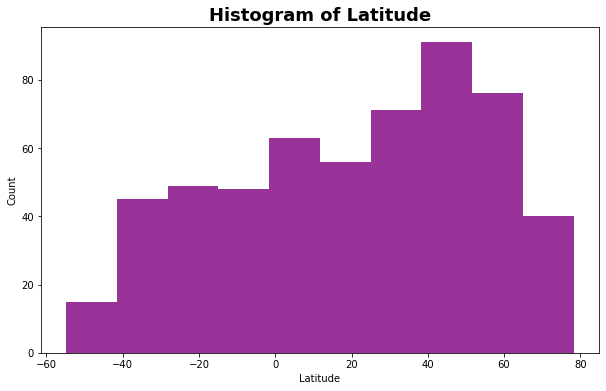

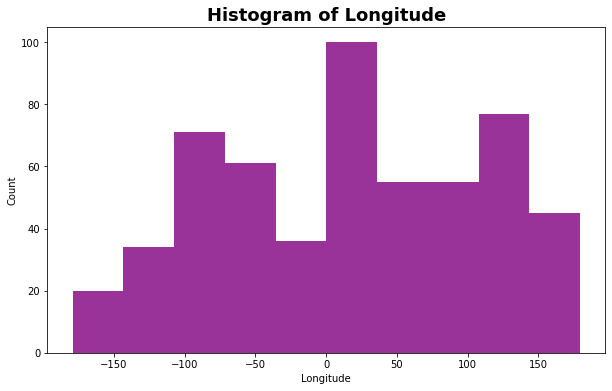

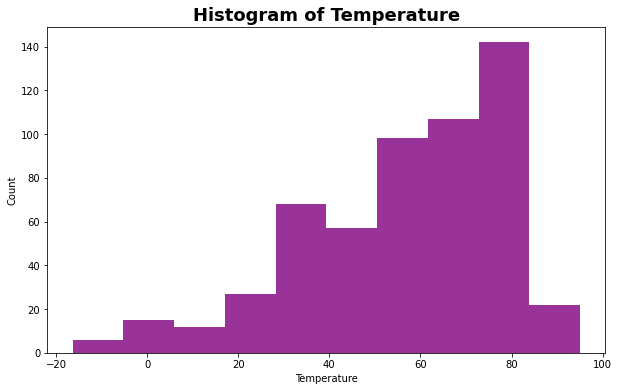

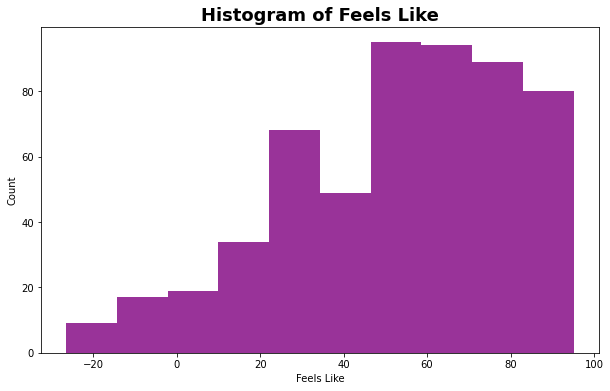

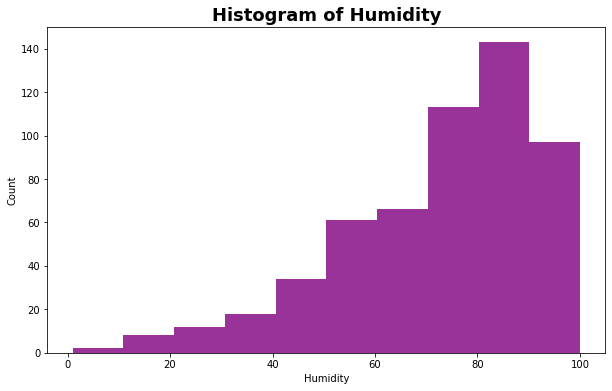

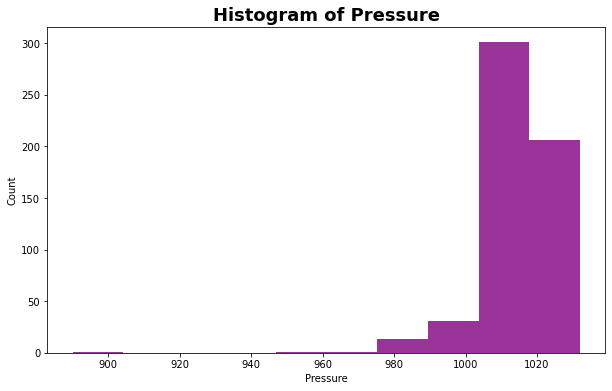

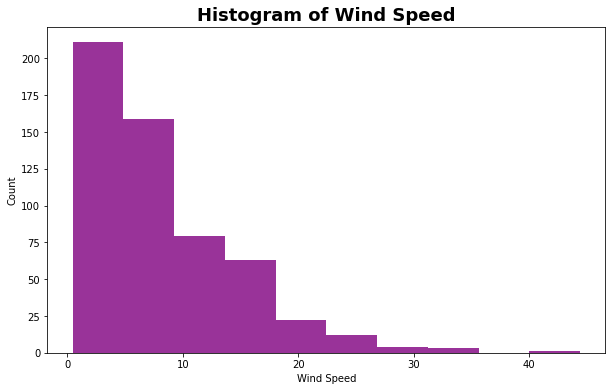

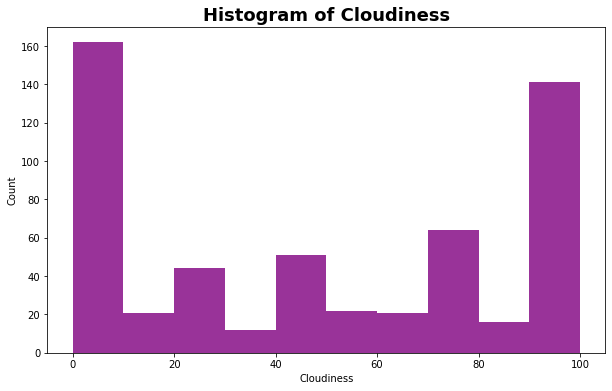

In [7]:

for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        plt.hist(df[col], color = "purple", alpha=0.8)
        plt.title(f"Histogram of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

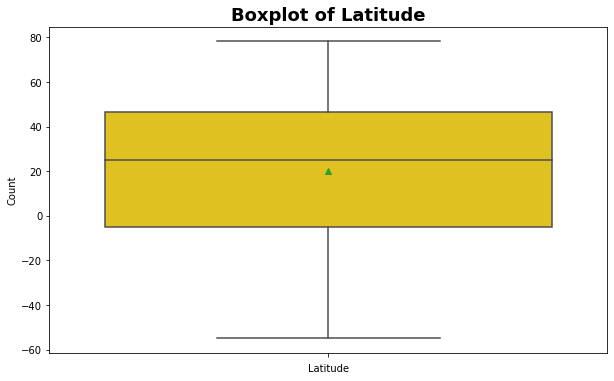

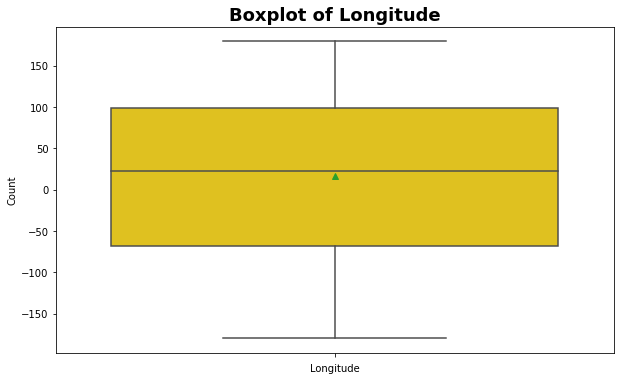

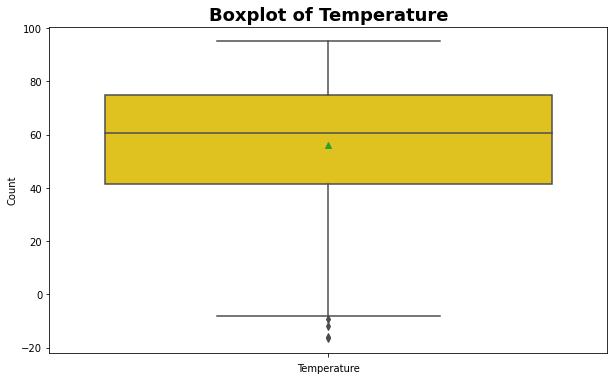

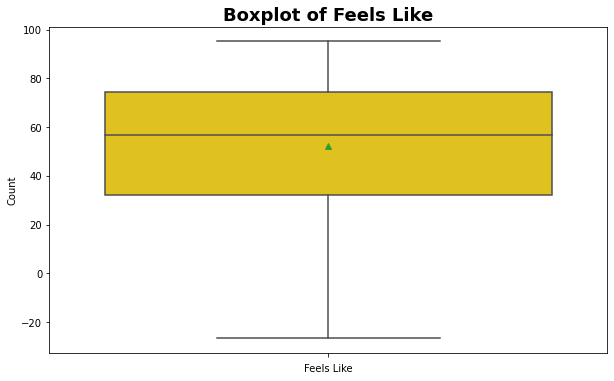

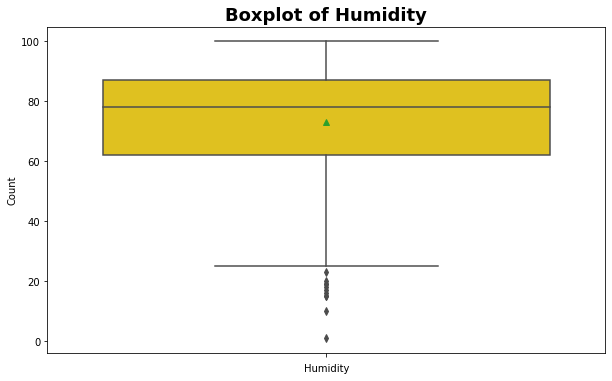

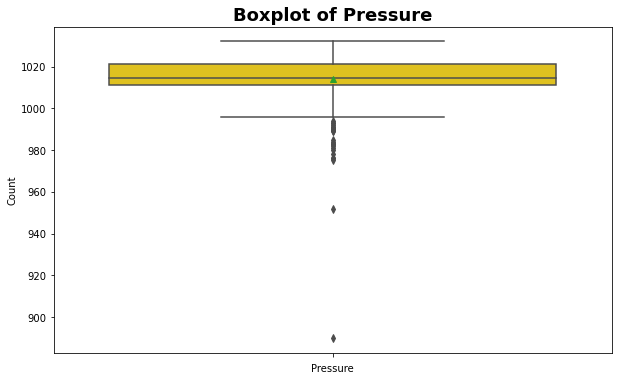

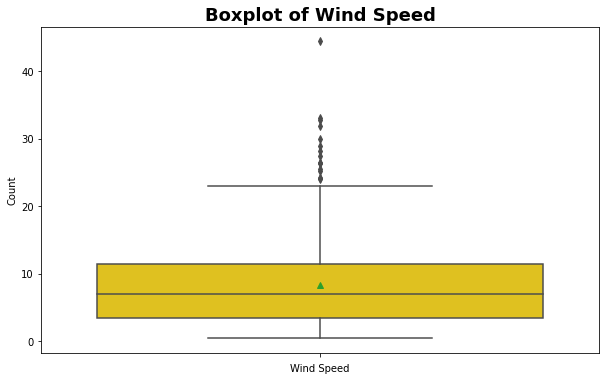

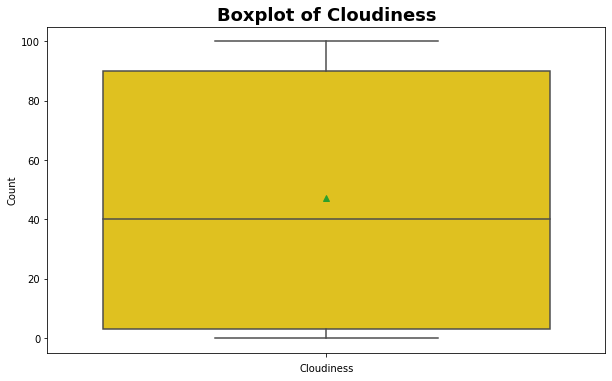

In [8]:


for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make boxplot
        plt.figure(figsize=(10,6))
    
        sns.boxplot(y=col, data=df, color = "gold", showmeans="True")
        plt.title(f"Boxplot of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

## Latitude vs. Temperature Plot

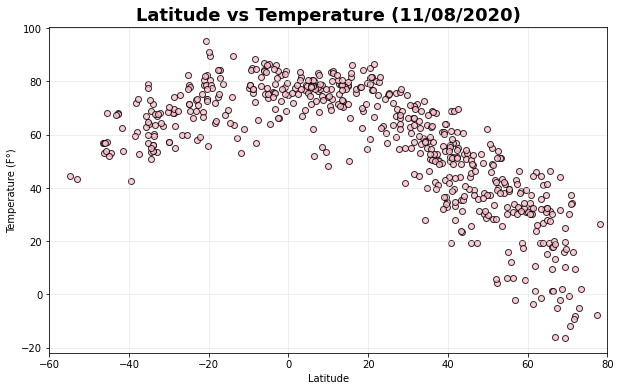

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "pink",edgecolor="black", linewidths=1,marker="o", alpha=0.8)
plt.title("Latitude vs Temperature (11/08/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

## Latitude vs. Humidity Plot

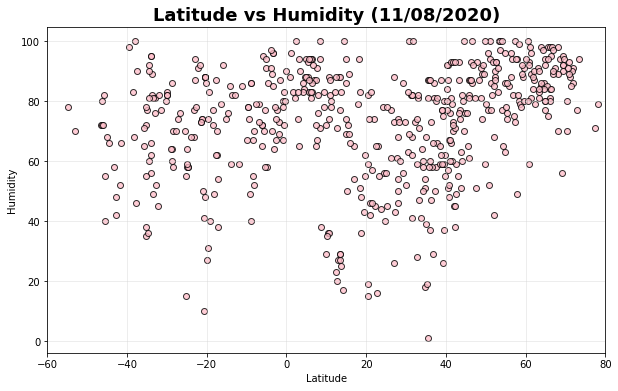

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "pink",edgecolor="black", linewidths=1,marker="o", alpha=0.8)
plt.title("Latitude vs Humidity (11/08/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

## Latitude vs. Cloudiness Plot

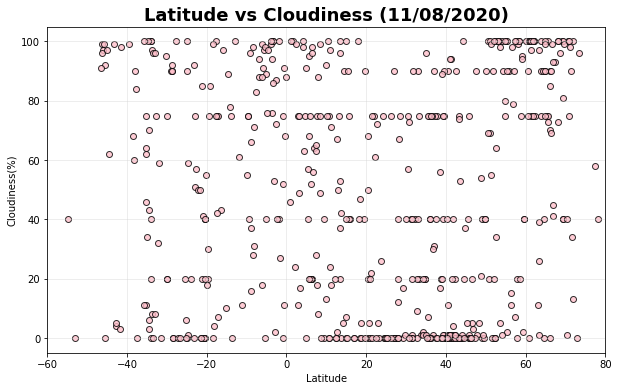

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "pink",edgecolor="black", linewidths=1,marker="o", alpha=0.8)
plt.title("Latitude vs Cloudiness (11/08/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

## Latitude vs. Wind Speed Plot

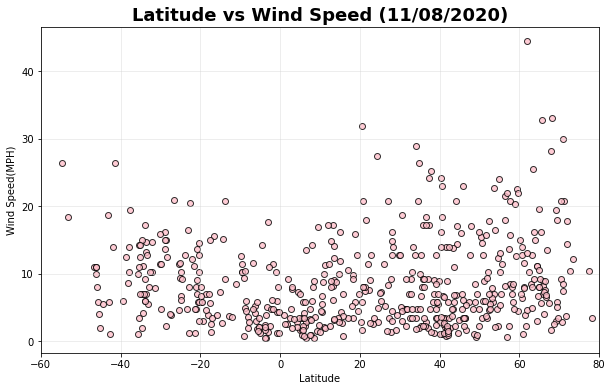

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "pink",edgecolor="black", linewidths=1,marker="o", alpha=0.8)
plt.title("Latitude vs Wind Speed (11/08/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(MPH)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

## Linear Regression

In [13]:
df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_WE"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness,Hemisphere_NS,Hemisphere_WE
0,Saskylakh,71.92,114.08,-7.91,-22.68,86,1008,14.38,13,Northern,Eastern
1,Te Anau,-45.42,167.72,57.13,52.84,55,1018,4.05,92,Southern,Eastern
2,Busselton,-33.65,115.33,60.37,53.62,82,996,14.65,97,Southern,Eastern
3,Puerto Ayora,-0.74,-90.35,69.01,70.34,83,1012,5.99,11,Southern,Western
4,Hirado,33.36,129.55,56.39,45.70,47,1022,13.87,20,Northern,Eastern


In [14]:
def doRegressionWork(hemisphere, df, inp_target):
    #filter
    if hemisphere in ["Northern", "Southern"]:
        df_sub = df.loc[df.Hemisphere_NS == hemisphere]
    else:
        df_sub = df.loc[df.Hemisphere_WE == hemisphere]
        
    # get target
    target = df_sub[inp_target]
    feature = df_sub.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    # get equation
    slope = results.params[1]
    intercept = results.params[0]

    regress_values = feature * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    # plot
    plt.figure(figsize=(10,6))

    plt.scatter(df_sub.Latitude, df_sub[inp_target], color = "pink")
    plt.title(f"Latitude vs {inp_target}(11/04/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    plt.grid(color="lightgrey", alpha = 0.5)
    
    plt.plot(feature, regress_values, color="skyblue")
#     plt.annotate(line_eq,(-40, 0),fontsize=15,color="red")



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1097.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          3.92e-115
Time:                        21:10:35   Log-Likelihood:                -1519.6
No. Observations:                 390   AIC:                             3043.
Df Residuals:                     388   BIC:                             3051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.1500      1.292     68.247      0.0

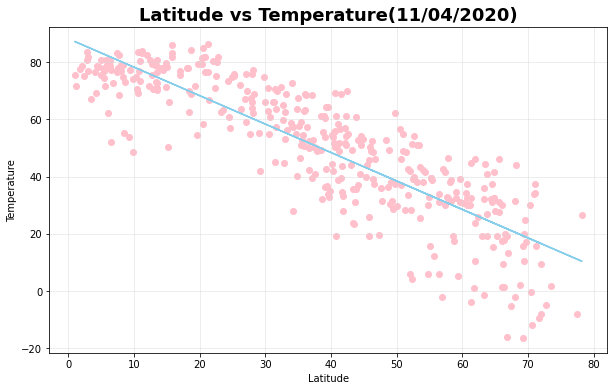

In [15]:
doRegressionWork("Northern", df, "Temperature")
plt.savefig("Northern_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.73e-20
Time:                        21:10:35   Log-Likelihood:                -577.96
No. Observations:                 164   AIC:                             1160.
Df Residuals:                     162   BIC:                             1166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.1631      1.212     66.948      0.0

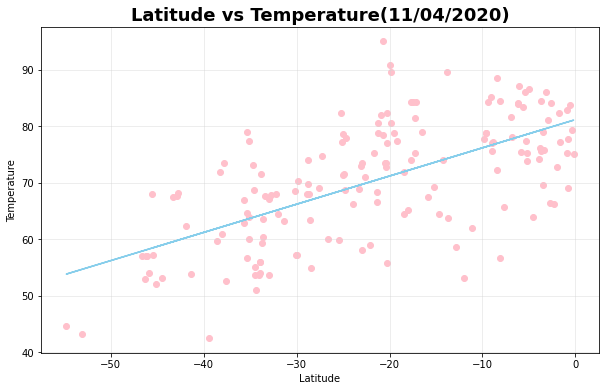

In [16]:
doRegressionWork("Southern", df, "Temperature")
plt.savefig("Southern_Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     36.01
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           4.51e-09
Time:                        21:10:35   Log-Likelihood:                -1699.4
No. Observations:                 390   AIC:                             3403.
Df Residuals:                     388   BIC:                             3411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.2117      2.048     30.863      0.0

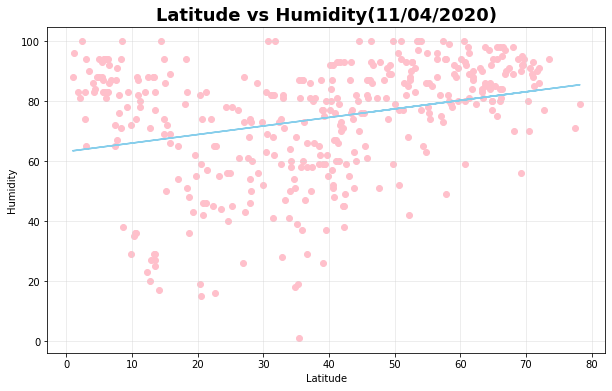

In [17]:
doRegressionWork("Northern", df, "Humidity")
plt.savefig("Northern_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     5.036
Date:                Sun, 08 Nov 2020   Prob (F-statistic):             0.0262
Time:                        21:10:36   Log-Likelihood:                -692.86
No. Observations:                 164   AIC:                             1390.
Df Residuals:                     162   BIC:                             1396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.3673      2.443     30.852      0.0

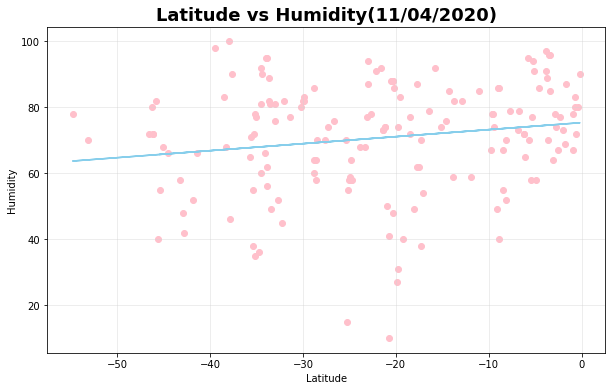

In [18]:
doRegressionWork("Southern", df, "Humidity")
plt.savefig("Southern_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.34
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           6.38e-05
Time:                        21:10:36   Log-Likelihood:                -1972.9
No. Observations:                 390   AIC:                             3950.
Df Residuals:                     388   BIC:                             3958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5712      4.130      7.160      0.0

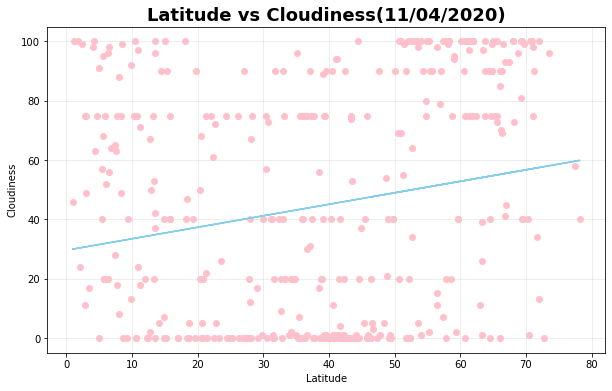

In [19]:
doRegressionWork("Northern", df, "Cloudiness")
plt.savefig("Northern_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.687
Date:                Sun, 08 Nov 2020   Prob (F-statistic):              0.196
Time:                        21:10:36   Log-Likelihood:                -824.47
No. Observations:                 164   AIC:                             1653.
Df Residuals:                     162   BIC:                             1659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.2555      5.450     11.056      0.0

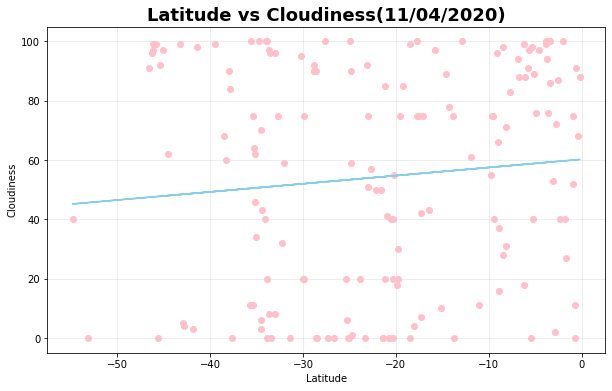

In [20]:
doRegressionWork("Southern", df, "Cloudiness")
plt.savefig("Southern_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     26.09
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           5.12e-07
Time:                        21:10:36   Log-Likelihood:                -1284.5
No. Observations:                 390   AIC:                             2573.
Df Residuals:                     388   BIC:                             2581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1861      0.707      7.337      0.0

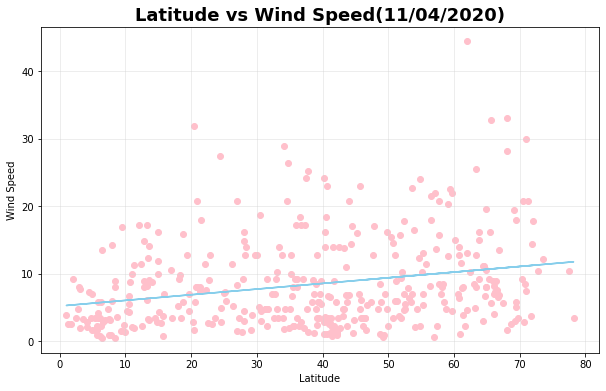

In [21]:
doRegressionWork("Northern", df, "Wind Speed")
plt.savefig("Northern_WindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     30.17
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.51e-07
Time:                        21:10:36   Log-Likelihood:                -493.24
No. Observations:                 164   AIC:                             990.5
Df Residuals:                     162   BIC:                             996.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8285      0.723      6.676      0.0

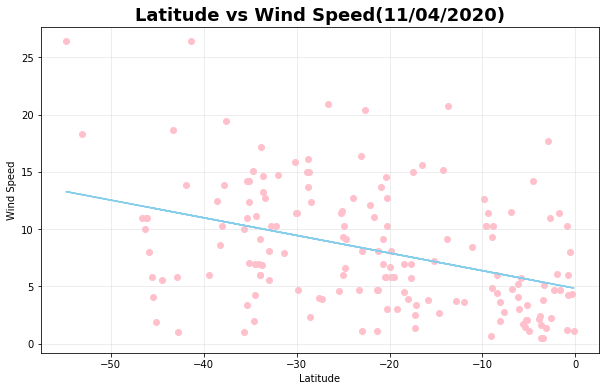

In [22]:
doRegressionWork("Southern", df, "Wind Speed")
plt.savefig("Southern_WindSpeed.png")

In [23]:
plt.show()